<a href="https://colab.research.google.com/github/vidhu-psit/MachineLearning/blob/master/Linear_Regression/Class3/Housing_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#x^2
x = -7
#x = x -0.1 * derivatie
for i in range(10):
  x = x -0.1 * 2*x
  print(x)

-5.6
-4.4799999999999995
-3.5839999999999996
-2.8671999999999995
-2.29376
-1.8350079999999998
-1.4680063999999997
-1.1744051199999999
-0.9395240959999999
-0.7516192767999998


In [ ]:
#Importing the dataset
import pandas as pd
housing = pd.read_csv('https://raw.githubusercontent.com/divyabharathynadar/Bharat_Intern-M.L/refs/heads/main/House%20Price%20Prediction/Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Converting Yes to 1 and No to 0
housing['mainroad'] = housing['mainroad'].map({'yes': 1, 'no': 0})
housing['guestroom'] = housing['guestroom'].map({'yes': 1, 'no': 0})
housing['basement'] = housing['basement'].map({'yes': 1, 'no': 0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes': 1, 'no': 0})
housing['airconditioning'] = housing['airconditioning'].map({'yes': 1, 'no': 0})
housing['prefarea'] = housing['prefarea'].map({'yes': 1, 'no': 0})

In [ ]:
#Converting furnishingstatus column to binary column using get_dummies
status = pd.get_dummies(housing['furnishingstatus'],drop_first=True)
housing = pd.concat([housing,status],axis=1)
housing.drop(['furnishingstatus'],axis=1,inplace=True)

In [ ]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [ ]:
# Normalisisng the data
housing = (housing - housing.mean())/housing.std()
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,4.562174,1.045766,1.402131,1.420507,1.376952,0.405251,-0.464888,-0.733865,-0.219063,1.471267,1.516299,1.803284,-0.844113,-0.69579
1,4.000809,1.755397,1.402131,5.400847,2.529700,0.405251,-0.464888,-0.733865,-0.219063,1.471267,2.676950,-0.553526,-0.844113,-0.69579
2,4.000809,2.216196,0.047235,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,-0.678439,1.516299,1.803284,1.182502,-0.69579
3,3.982096,1.082630,1.402131,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,1.471267,2.676950,1.803284,-0.844113,-0.69579
4,3.551716,1.045766,1.402131,-0.569663,0.224204,0.405251,2.147110,1.360148,-0.219063,1.471267,1.516299,-0.553526,-0.844113,-0.69579


In [ ]:
# Simple linear regression
# Assign feature variable X
X = housing['area']

# Assign response variable to y
y = housing['price']

In [ ]:
# Conventional way to import seaborn
import seaborn as sns

# To visualise in the notebook
%matplotlib inline

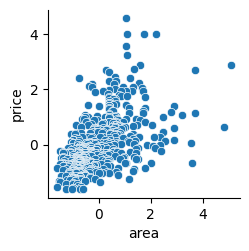

In [ ]:
sns.pairplot(housing, x_vars='area', y_vars='price', kind='scatter')

In [ ]:
import numpy as np
X = np.array(X)
y = np.array(y)
# y[2,3,2.3]
# curent_y[9,3.5,12.3]
#[(2-9)^2, (3-3.5)^2]


In [ ]:
def gradient(X, y, m_current=0, c_current=0, iters=100, learning_rate=0.1):
  N = len(y)
  gd_df = pd.DataFrame( columns = ['m_current', 'c_current','cost'])
  for i in range(iters):
    y_current = (m_current * X) + c_current #precited m =50, c-90
    #                                A - Predicted
    cost = sum([data**2 for data in (y-y_current)]) / N

    m_gradient = -(2/N) * sum(X * (y - y_current))
    c_gradient = -(2/N) * sum(y - y_current)

    m_current = m_current - (learning_rate * m_gradient)
    c_current = c_current - (learning_rate * c_gradient)
    gd_df.loc[i] = [m_current,c_current,cost]
  return(gd_df)


In [ ]:
gradients = gradient(X,y)
gradients

,m_current,c_current,cost
0,0.107003,5.117211e-17,0.998165
1,0.192644,2.501567e-17,0.895098
2,0.261189,1.361602e-16,0.829074
3,0.316050,1.866804e-16,0.786780
4,0.359959,2.565939e-16,0.759687
...,...,...,...
95,0.535997,1.680205e-16,0.711399
96,0.535997,1.600351e-16,0.711399
97,0.535997,3.016547e-16,0.711399
98,0.535997,2.493418e-16,0.711399


<Axes: xlabel='index'>

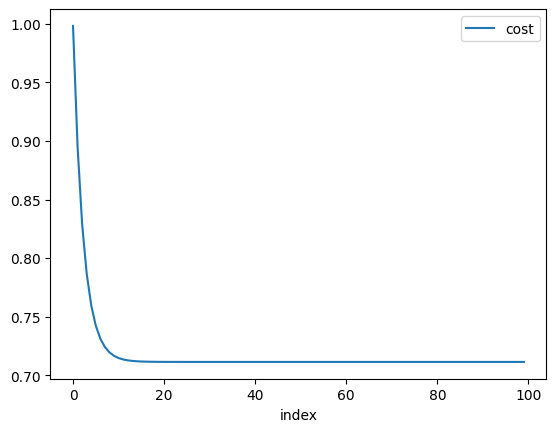

In [ ]:
gradients.reset_index().plot.line(x='index', y=['cost'])

In [ ]:
def gradient(X, y, m_current=1000, c_current=-78, iters=100, learning_rate=0.1):
  N = len(y)
  gd_df = pd.DataFrame( columns = ['m_current', 'c_current','cost'])
  for i in range(iters):
    y_current = (m_current * X) + c_current #precited m =50, c-90
    #                                A - Predicted
    cost = sum([data**2 for data in (y-y_current)]) / N
    gd_df.loc[i] = [m_current,c_current,cost]

    m_gradient = -(2/N) * sum(X * (y - y_current))
    c_gradient = -(2/N) * sum(y - y_current)

    m_current = m_current - (learning_rate * m_gradient)
    c_current = c_current - (learning_rate * c_gradient)

  return(gd_df)

In [ ]:
gradients = gradient(X,y)
gradients

,m_current,c_current,cost
0,1000.000000,-7.800000e+01,1.003180e+06
1,800.473975,-6.240000e+01,6.426211e+05
2,640.779935,-4.992000e+01,4.116529e+05
3,512.966099,-3.993600e+01,2.636984e+05
4,410.668127,-3.194880e+01,1.689212e+05
...,...,...,...
95,0.535998,-4.848902e-08,7.113991e-01
96,0.535998,-3.879121e-08,7.113991e-01
97,0.535998,-3.103297e-08,7.113991e-01
98,0.535998,-2.482638e-08,7.113991e-01


In [ ]:
m_current =0.5
c_current = 0.

In [ ]:
Area = 2000
y_pred = m_current *X + c_current

In [ ]:
y_pred

array([ 5.22882774e-01,  8.77698425e-01,  1.10809820e+00,  5.41314756e-01,
        5.22882774e-01,  5.41314756e-01,  7.90146511e-01,  2.54579279e+00,
        6.79554620e-01,  1.38115152e-01,  1.85459346e+00,  1.95715096e-01,
        3.22434971e-01, -3.80284338e-01,  6.10434688e-01,  1.95715096e-01,
        3.33954960e-01,  7.71714529e-01, -1.26844587e-01,  2.92483001e-01,
       -1.91356524e-01,  4.61826834e-01,  6.68034631e-01, -1.36060578e-01,
        8.40834461e-01,  3.20130973e-01,  1.95715096e-01,  8.58114444e-01,
        6.44994654e-01,  8.05152089e-02,  5.35554762e-01,  4.26114869e-01,
       -6.23326506e-02,  1.86499105e-01,  3.89250905e-01,  4.26114869e-01,
        5.37167560e-01,  8.86914416e-01,  1.95715096e-01,  1.95715096e-01,
        3.22434971e-01,  2.78659014e-01,  3.06306987e-01,  1.95715096e-01,
        1.95715096e-01,  1.95715096e-01,  1.95715096e-01,  3.33954960e-01,
       -1.95964519e-01,  5.27490769e-01,  5.27490769e-01,  2.70595022e-01,
        1.95715096e-01, -

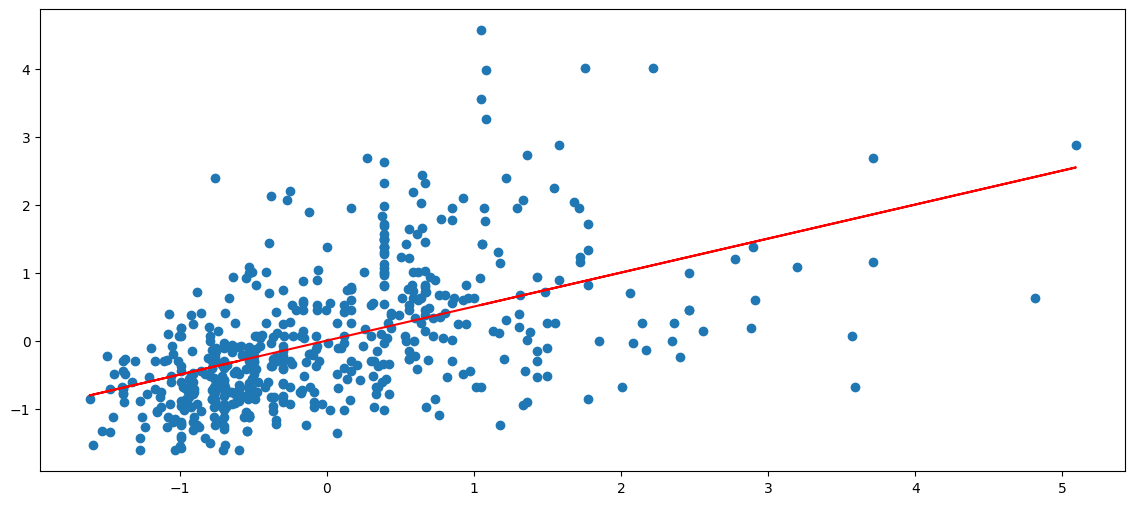

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.scatter(X,y)
plt.plot(X,y_pred,"r")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()


In [ ]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [ ]:
X

array([[ 1.04576555e+00],
       [ 1.75539685e+00],
       [ 2.21619640e+00],
       [ 1.08262951e+00],
       [ 1.04576555e+00],
       [ 1.08262951e+00],
       [ 1.58029302e+00],
       [ 5.09158557e+00],
       [ 1.35910924e+00],
       [ 2.76230305e-01],
       [ 3.70918693e+00],
       [ 3.91430191e-01],
       [ 6.44869942e-01],
       [-7.60568676e-01],
       [ 1.22086938e+00],
       [ 3.91430191e-01],
       [ 6.67909919e-01],
       [ 1.54342906e+00],
       [-2.53689174e-01],
       [ 5.84966001e-01],
       [-3.82713048e-01],
       [ 9.23653668e-01],
       [ 1.33606926e+00],
       [-2.72121156e-01],
       [ 1.68166892e+00],
       [ 6.40261947e-01],
       [ 3.91430191e-01],
       [ 1.71622889e+00],
       [ 1.28998931e+00],
       [ 1.61030418e-01],
       [ 1.07110952e+00],
       [ 8.52229738e-01],
       [-1.24665301e-01],
       [ 3.72998209e-01],
       [ 7.78501811e-01],
       [ 8.52229738e-01],
       [ 1.07433512e+00],
       [ 1.77382883e+00],
       [ 3.9

In [ ]:
lr.fit(X, y)

LinearRegression()

In [ ]:
lr.coef_

array([[0.53599735]])

In [ ]:
lr.intercept_

array([1.88156516e-16])

In [ ]:
y_pred = lr.predict(X)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_value = mean_squared_error(y, y_pred)

print(f"The Mean Squared Error is: {mse_value}")

The Mean Squared Error is: 0.7113991263366148


In [ ]:
housing.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


In [ ]:
# Simple linear regression
# Assign feature variable X
X = housing.iloc[:,1:]

# Assign response variable to y
y = housing['price']

In [ ]:
lr.fit(X, y)

LinearRegression()

In [ ]:
lr.coef_

array([ 0.28325795,  0.04529446,  0.26532437,  0.2090991 ,  0.07852177,
        0.06151278,  0.08938767,  0.09576867,  0.21511586,  0.12764461,
        0.14780027, -0.012226  , -0.1032027 ])

In [ ]:
lr.intercept_

np.float64(2.2183843195700336e-16)

In [ ]:
y_pred = lr.predict(X)

In [ ]:
mse_value = mean_squared_error(y, y_pred)

print(f"The Mean Squared Error is: {mse_value}")

The Mean Squared Error is: 0.31761430162681803


In [ ]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.681801848554014